Chapter 1. Introduction
======
***

* 베이지안 통계 스터디 - Python 트랙 : 파트2 [1]
* 김무성

### Contents

- The Philosophy of Bayesian Inference
- The Bayesian state of mind
- Bayesian Inference in Practice
    - Incorporating evidence
- Are frequentist methods incorrect then?
    - A note on Big Data
- Our Bayesian framework
    - Example: Mandatory coin-flip example
    - Example: Bug, or just sweet, unintended feature?
- Probability Distributions
    - Discrete Case
    - Continuous Case
    - But what is $\lambda \;$?
    - Example: Inferring behaviour from text-message data
- Introducing our first hammer: PyMC
    - Interpretation
    - Why would I want samples from the posterior, anyways?

The Philosophy of Bayesian Inference
------
  
> You are a skilled programmer, but bugs still slip into your code. After a particularly difficult implementation of an algorithm, you decide to test your code on a trivial example. It passes. You test the code on a harder problem. It passes once again. And it passes the next, *even more difficult*, test too! You are starting to believe that there may be no bugs in this code...

If you think this way, then congratulations, you already are thinking Bayesian! Bayesian inference is simply updating your beliefs after considering new evidence. A Bayesian can rarely be certain about a result, but he or she can be very confident. Just like in the example above, we can never be 100% sure that our code is bug-free unless we test it on every possible problem; something rarely possible in practice. Instead, we can test it on a large number of problems, and if it succeeds we can feel more *confident* about our code, but still not certain.  Bayesian inference works identically: we update our beliefs about an outcome; rarely can we be absolutely sure unless we rule out all other alternatives. 


### The Bayesian state of mind


* uncertainty 
* certainty
* probability as measure of *believability in an event*
* *Frequentist*, known as the more *classical* version of statistics
    - probability is the long-run frequency of events (hence the bestowed title)
* Bayesians, on the other hand, have a more intuitive approach. 
    - Bayesians interpret a probability as measure of *belief*, or confidence, of an event occurring
* I flip a coin 
* Your code either has a bug in it or not
* A medical patient is exhibiting symptoms $x$, $y$ and $z$. 
* To align ourselves with traditional probability notation, we denote our belief about event $A$ as $P(A)$. We call this quantity the *prior probability*.
* John Maynard Keynes, a great economist and thinker, said "When the facts change, I change my mind. What do you do, sir?"
* We denote our updated belief as $P(A |X )$, interpreted as the probability of $A$ given the evidence $X$. 
* We call the updated belief the *posterior probability* so as to contrast it with the prior probability. 
    - For example, consider the posterior probabilities (read: posterior beliefs) of the above examples, after observing some evidence $X$:
        - 1\. $P(A): \;\;$ the coin has a 50 percent chance of being Heads. $P(A | X):\;\;$ You look at the coin, observe a Heads has landed, denote this information $X$, and trivially assign probability 1.0 to Heads and 0.0 to Tails.
        - 2\.   $P(A): \;\;$  This big, complex code likely has a bug in it. $P(A | X): \;\;$ The code passed all $X$ tests; there still might be a bug, but its presence is less likely now.
        - 3\.  $P(A):\;\;$ The patient could have any number of diseases. $P(A | X):\;\;$ Performing a blood test generated evidence $X$, ruling out some of the possible diseases from consideration.
* *re-weighted the prior* to incorporate the new evidence 
* After observing data, evidence, or other information, we update our beliefs, and our guess becomes *less wrong*. This is the alternative side of the prediction coin, where typically we try to be *more right*. 



### Bayesian Inference in Practice

* The frequentist inference function 
    - would return a number, representing an estimate (typically a summary statistic like the sample average etc.), 
* The Bayesian function 
    - would return *probabilities*.
* For example, in our debugging problem above, 
    - calling the frequentist function with the argument "My code passed all $X$ tests; is my code bug-free?" 
        - would return a *YES*. 
    - On the other hand, asking our Bayesian function "Often my code has bugs. My code passed all $X$ tests; is my code bug-free?" 
        - would return something very different: probabilities of *YES* and *NO*. The function might return:
        - *YES*, with probability 0.8; *NO*, with probability 0.2


####Incorporating evidence


* Denote $N$ as the number of instances of evidence we possess. 
* As we gather an *infinite* amount of evidence, say as $N \rightarrow \infty$, 
    - our Bayesian results (often) align with frequentist results. 
    - Hence for large $N$, statistical inference is more or less objective. 
* On the other hand, for small $N$, inference is much more *unstable*: 
    - frequentist estimates have more variance and larger confidence intervals. 
    - This is where Bayesian analysis excels. 
        - By introducing a prior, 
        - and returning probabilities (instead of a scalar estimate), 
        - we *preserve the uncertainty* that reflects the instability of statistical inference of a small $N$ dataset. 


### Are frequentist methods incorrect then? 

**No.**

Frequentist methods are still useful or state-of-the-art in many areas. Tools such as least squares linear regression, LASSO regression, and expectation-maximization algorithms are all powerful and fast. Bayesian methods complement these techniques by solving problems that these approaches cannot, or by illuminating the underlying system with more flexible modeling.


#### A note on *Big Data*
Paradoxically, big data's predictive analytic problems are actually solved by relatively simple algorithms [2][4]. Thus we can argue that big data's prediction difficulty does not lie in the algorithm used, but instead on the computational difficulties of storage and execution on big data. (One should also consider Gelman's quote from above and ask "Do I really have big data?" )

The much more difficult analytic problems involve *medium data* and, especially troublesome, *really small data*. Using a similar argument as  Gelman's above, if big data problems are *big enough* to be readily solved, then we should be more interested in the *not-quite-big enough* datasets. 


### Our Bayesian framework



\begin{align}
 P( A | X ) = & \frac{ P(X | A) P(A) } {P(X) } \\\\[5pt]
& \propto P(X | A) P(A)\;\; (\propto \text{is proportional to } )
\end{align}

The above formula is not unique to Bayesian inference: it is a mathematical fact with uses outside Bayesian inference. Bayesian inference merely uses it to connect prior probabilities $P(A)$ with an updated posterior probabilities $P(A | X )$.

##### Example: Mandatory coin-flip example

Every statistics text must contain a coin-flipping example, I'll use it here to get it out of the way. Suppose, naively, that you are unsure about the probability of heads in a coin flip (spoiler alert: it's 50%). You believe there is some true underlying ratio, call it $p$, but have no prior opinion on what $p$ might be. 

We begin to flip a coin, and record the observations: either $H$ or $T$. This is our observed data. An interesting question to ask is how our inference changes as we observe more and more data? More specifically, what do our posterior probabilities look like when we have little data, versus when we have lots of data. 

Below we plot a sequence of updating posterior probabilities as we observe increasing amounts of data (coin flips).

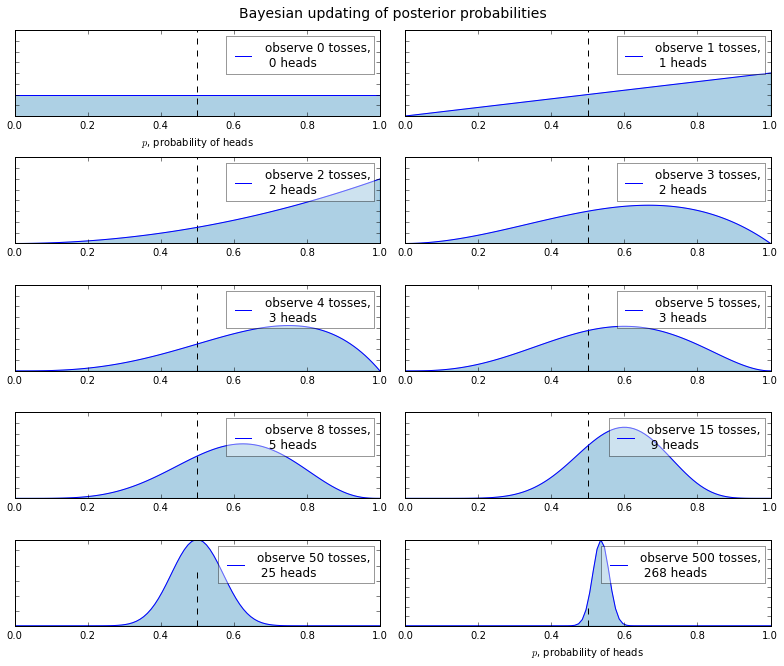

In [18]:
"""
The book uses a custom matplotlibrc file, which provides the unique styles for
matplotlib plots. If executing this book, and you wish to use the book's
styling, provided are two options:
    1. Overwrite your own matplotlibrc file with the rc-file provided in the
       book's styles/ dir. See http://matplotlib.org/users/customizing.html
    2. Also in the styles is  bmh_matplotlibrc.json file. This can be used to
       update the styles in only this notebook. Try running the following code:

        import json, matplotlib
        s = json.load( open("../styles/bmh_matplotlibrc.json") )
        matplotlib.rcParams.update(s)

"""

# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

##### Example: Bug, or just sweet, unintended feature?


Let $A$ denote the event that our code has **no bugs** in it. Let $X$ denote the event that the code passes all debugging tests. For now, we will leave the prior probability of no bugs as a variable, i.e. $P(A) = p$. 

We are interested in $P(A|X)$, i.e. the probability of no bugs, given our debugging tests $X$. To use the formula above, we need to compute some quantities.

What is $P(X | A)$, i.e., the probability that the code passes $X$ tests *given* there are no bugs? Well, it is equal to 1, for a code with no bugs will pass all tests. 

$P(X)$ is a little bit trickier: The event $X$ can be divided into two possibilities, event $X$ occurring even though our code *indeed has* bugs (denoted $\sim A\;$, spoken *not $A$*), or event $X$ without bugs ($A$). $P(X)$ can be represented as:

\begin{align}
P(X ) & = P(X \text{ and } A) + P(X \text{ and } \sim A) \\\\[5pt]
 & = P(X|A)P(A) + P(X | \sim A)P(\sim A)\\\\[5pt]
& = P(X|A)p + P(X | \sim A)(1-p)
\end{align}

We have already computed $P(X|A)$ above. On the other hand, $P(X | \sim A)$ is subjective: our code can pass tests but still have a bug in it, though the probability there is a bug present is reduced. Note this is dependent on the number of tests performed, the degree of complication in the tests, etc. Let's be conservative and assign $P(X|\sim A) = 0.5$. Then

\begin{align}
P(A | X) & = \frac{1\cdot p}{ 1\cdot p +0.5 (1-p) } \\\\
& = \frac{ 2 p}{1+p}
\end{align}
This is the posterior probability. What does it look like as a function of our prior, $p \in [0,1]$? 

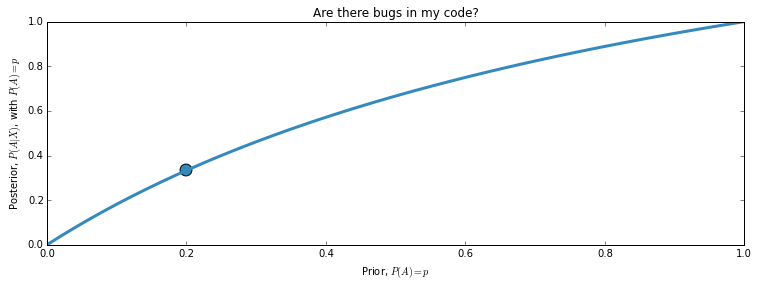

In [19]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 * p / (1 + p), color="#348ABD", lw=3)
# plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2 * (0.2) / 1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Are there bugs in my code?")

We can see the biggest gains if we observe the $X$ tests passed when the prior probability, $p$, is low. Let's settle on a specific value for the prior. I'm a strong programmer (I think), so I'm going to give myself a realistic prior of 0.20, that is, there is a 20% chance that I write code bug-free. To be more realistic, this prior should be a function of how complicated and large the code is, but let's pin it at 0.20. Then my updated belief that my code is bug-free is 0.33. 

Recall that the prior is a probability: $p$ is the prior probability that there *are no bugs*, so $1-p$ is the prior probability that there *are bugs*.

Similarly, our posterior is also a probability, with $P(A | X)$ the probability there is no bug *given we saw all tests pass*, hence $1-P(A|X)$ is the probability there is a bug *given all tests passed*. What does our posterior probability look like? Below is a chart of both the prior and the posterior probabilities. 

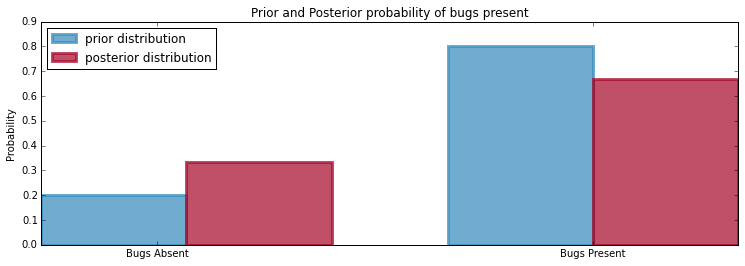

In [3]:
figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

prior = [0.20, 0.80]
posterior = [1. / 3, 2. / 3]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="prior distribution",
        lw="3", edgecolor=colours[0])

plt.bar([0 + 0.25, .7 + 0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label="posterior distribution",
        lw="3", edgecolor=colours[1])

plt.xticks([0.20, .95], ["Bugs Absent", "Bugs Present"])
plt.title("Prior and Posterior probability of bugs present")
plt.ylabel("Probability")
plt.legend(loc="upper left");

Notice that after we observed $X$ occur, the probability of bugs being absent increased. By increasing the number of tests, we can approach confidence (probability 1) that there are no bugs present.

This was a very simple example of Bayesian inference and Bayes rule. Unfortunately, the mathematics necessary to perform more complicated Bayesian inference only becomes more difficult, except for artificially constructed cases. We will later see that this type of mathematical analysis is actually unnecessary. First we must broaden our modeling tools. The next section deals with *probability distributions*. If you are already familiar, feel free to skip (or at least skim), but for the less familiar the next section is essential.

_______

##Probability Distributions


* Let $Z$ be some random variable. 
* Then associated with $Z$ is a *probability distribution function* that assigns probabilities to the different outcomes $Z$ can take. 
* We can divide random variables into three classifications:
    -   **$Z$ is discrete**
    -   **$Z$ is continuous**
    -  **$Z$ is mixed**

###Discrete Case

* *probability mass function*, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$.
* let's introduce the first very useful probability mass function. We say $Z$ is *Poisson*-distributed if:
    
$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$


* If a random variable $Z$ has a Poisson mass distribution, we denote this by writing

$$Z \sim \text{Poi}(\lambda) $$

* One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$


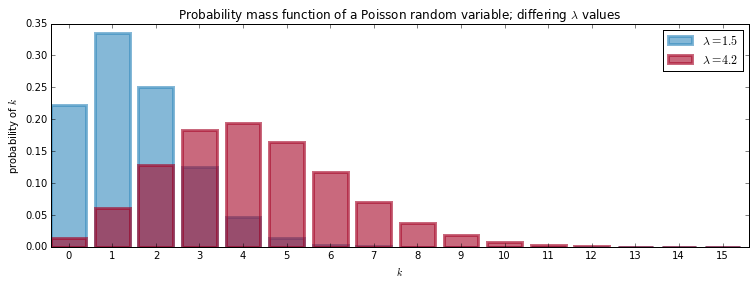

In [4]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values")

###Continuous Case

* a continuous random variable has a *probability density function*. 
* An example of continuous random variable is a random variable with *exponential density*. 
* The density function for an exponential random variable looks like this:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

* When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential* and write

$$Z \sim \text{Exp}(\lambda)$$

* Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

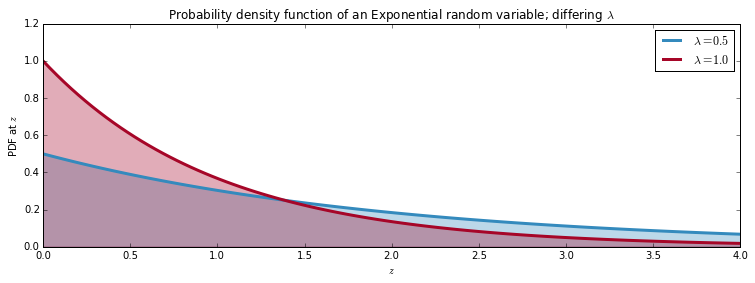

In [5]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");


###But what is $\lambda \;$?


**This question is what motivates statistics**. 
* In the real world, $\lambda$ is hidden from us. 
* We see only $Z$, and must go backwards to try and determine $\lambda$. 
* Many different methods have been created to solve the problem of estimating $\lambda$, but since $\lambda$ is never actually observed, no one can say for certain which method is best! 
* Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. 
    - Rather than try to guess $\lambda$ exactly, 
    - we can only talk about what $\lambda$ is likely to be by assigning a probability distribution to $\lambda$.
    - Recall that under Bayesian philosophy, we *can* assign probabilities if we interpret them as beliefs. And it is entirely acceptable to have *beliefs* about the parameter $\lambda$. 


##### Example: Inferring behaviour from text-message data

Let's try to model a more interesting example, one that concerns the rate at which a user sends and receives text messages:

>  You are given a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's text-messaging habits have changed over time, either gradually or suddenly. How can you model this? (This is in fact my own text-message data. Judge my popularity as you wish.)


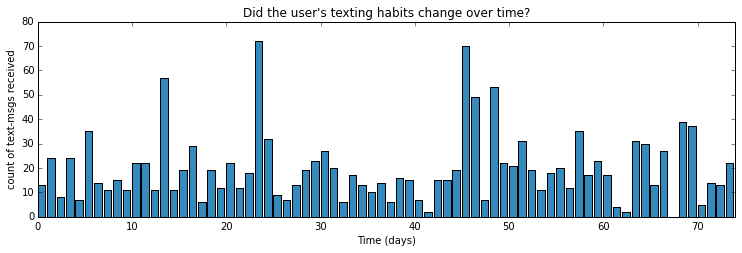

In [6]:
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

* Before we start modeling, see what you can figure out just by looking at the chart above. Would you say there was a change in behaviour during this time period? 

* How can we start to model this? Well, as we have conveniently already seen, a Poisson random variable is a very appropriate model for this type of *count* data. Denoting day $i$'s text-message count by $C_i$, 

$$ C_i \sim \text{Poisson}(\lambda)  $$


* *switchpoint*:

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$

* We are interested in inferring the unknown $\lambda$s. 
* To use Bayesian inference, we need to assign prior probabilities to the different possible values of $\lambda$. 
* Recall that $\lambda$ can be any positive number. As we saw earlier, the *exponential* distribution provides a continuous density function for positive numbers, so it might be a good choice for modeling $\lambda_i$. 
* But recall that the exponential distribution takes a parameter of its own, so we'll need to include that parameter in our model. 
* Let's call that parameter $\alpha$.

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}

* $\alpha$ is called a *hyper-parameter* or *parent variable*. 

* In literal terms, it is a parameter that influences other parameters. 
* Our initial guess at $\alpha$ does not influence the model too strongly, so we have some flexibility in our choice.  
* A good rule of thumb is to set the exponential parameter equal to the inverse of the average of the count data. 
* Since we're modeling $\lambda$ using an exponential distribution, we can use the expected value identity shown earlier to get:

$$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 

* An alternative, and something I encourage the reader to try, would be to have two priors: one for each $\lambda_i$.
* Creating two exponential distributions with different $\alpha$ values reflects our prior belief that the rate changed at some point during the observations.

* What about $\tau$? 
    - Because of the noisiness of the data, it's difficult to pick out a priori when $\tau$ might have occurred. 
    - Instead, we can assign a *uniform prior belief* to every possible day. This is equivalent to saying

\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}

* So after all this, what does our overall prior distribution for the unknown variables look like? 
    - Frankly, *it doesn't matter*. 

We next turn to PyMC, a Python library for performing Bayesian analysis that is undaunted by the mathematical monster we have created. 


Introducing our first hammer: PyMC
-----

* PyMC is a Python library for programming Bayesian analysis 
* It is a fast, well-maintained library. 
* We will model the problem above using PyMC. 
* This type of programming is called *probabilistic programming*
* it is probabilistic in the sense that we create probability models using programming variables as the model's components. 
* Model components are first-class primitives within the PyMC framework. 
* PyMC code is easy to read. 
    - The only novel thing should be the syntax, and I will interrupt the code to explain individual sections. 
    - Simply remember that we are representing the model's components ($\tau, \lambda_1, \lambda_2$ ) as variables:

In [23]:
import pymc as pm

alpha = 1.0 / count_data.mean()  # Recall count_data is the
                               # variable that holds our txt counts
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In the code above, we create the PyMC variables corresponding to $\lambda_1$ and $\lambda_2$. We assign them to PyMC's *stochastic variables*, so-called because they are treated by the back end as random number generators. We can demonstrate this fact by calling their built-in `random()` methods.

In [24]:
print "Random output:", tau.random(), tau.random(), tau.random()

Random output: 57 72 18


In [25]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

This code creates a new function `lambda_`, but really we can think of it as a random variable: the random variable $\lambda$ from above. Note that because `lambda_1`, `lambda_2` and `tau` are random, `lambda_` will be random. We are **not** fixing any variables yet.

`@pm.deterministic` is a decorator that tells PyMC this is a deterministic function. That is, if the arguments were deterministic (which they are not), the output would be deterministic as well. Deterministic functions will be covered in Chapter 2. 

In [26]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

* The variable `observation` 
    - combines our data, `count_data` through the `value` keyword. 
    - with our proposed data-generation scheme, given by the variable `lambda_`. 
    - We also set `observed = True` to tell PyMC that this should stay fixed in our analysis. 
* Finally, PyMC wants us to collect all the variables of interest and create a `Model` instance out of them. 

* The code below will be explained in Chapter 3, but I show it here so you can see where our results come from. 
    - One can think of it as a *learning* step. 
    - The machinery being employed is called *Markov Chain Monte Carlo* (MCMC), which I also delay explaining until Chapter 3. 
    - This technique returns thousands of random variables from the posterior distributions of $\lambda_1, \lambda_2$ and $\tau$. 
    - We can plot a histogram of the random variables to see what the posterior distributions look like. Below, we collect the samples (called *traces* in the MCMC literature) into histograms.

In [27]:
# Mysterious code to be explained in Chapter 3.
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 6.5 sec

In [28]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

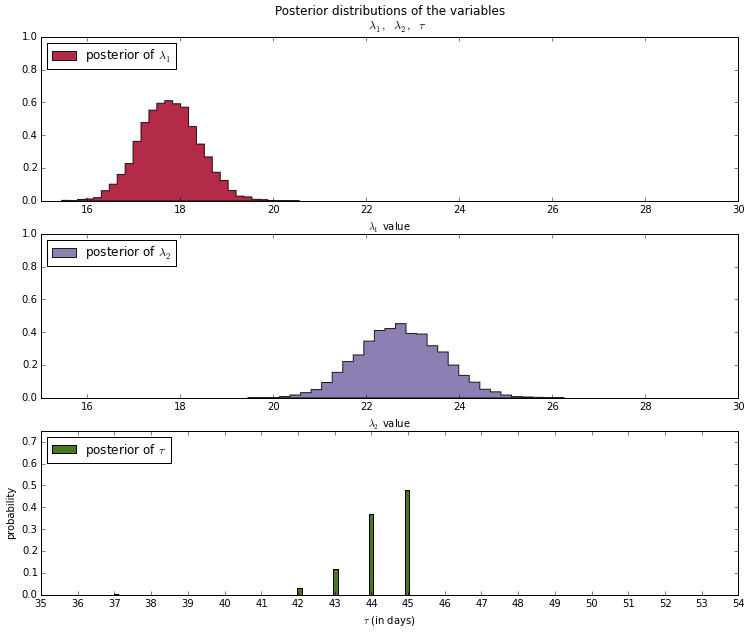

In [29]:
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

### Interpretation

* Recall that Bayesian methodology returns a *distribution*. 
* Hence we now have distributions to describe the unknown $\lambda$s and $\tau$. 
* What have we gained? 
    - Immediately, we can see the uncertainty in our estimates: 
    - the wider the distribution, the less certain our posterior belief should be. 
    - We can also see what the plausible values for the parameters are: 
        - $\lambda_1$ is around 18 and 
        - $\lambda_2$ is around 23. 
        - The posterior distributions of the two $\lambda$s are clearly distinct, indicating that it is indeed likely that there was a change in the user's text-message behaviour.

* Our analysis also returned a distribution for $\tau$. 
    - Its posterior distribution looks a little different from the other two because it is a discrete random variable, so it doesn't assign probabilities to intervals. 
    - We can see that near day 45, there was a 50% chance that the user's behaviour changed. 
    - Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$. 
    - By contrast, in the actual results we see that only three or four days make any sense as potential transition points. 

###Why would I want samples from the posterior, anyways?


We will deal with this question for the remainder of the book, and it is an understatement to say that it will lead us to some amazing results. For now, let's end this chapter with one more example.

We'll use the posterior samples to answer the following question: what is the expected number of texts at day $t, \; 0 \le t \le 70$ ? Recall that the expected value of a Poisson variable is equal to its parameter $\lambda$. Therefore, the question is equivalent to *what is the expected value of $\lambda$ at time $t$*?

In the code below, let $i$ index samples from the posterior distributions. Given a day $t$, we average over all possible $\lambda_i$ for that day $t$, using $\lambda_i = \lambda_{1,i}$ if $t \lt \tau_i$ (that is, if the behaviour change has not yet occurred), else we use $\lambda_i = \lambda_{2,i}$. 

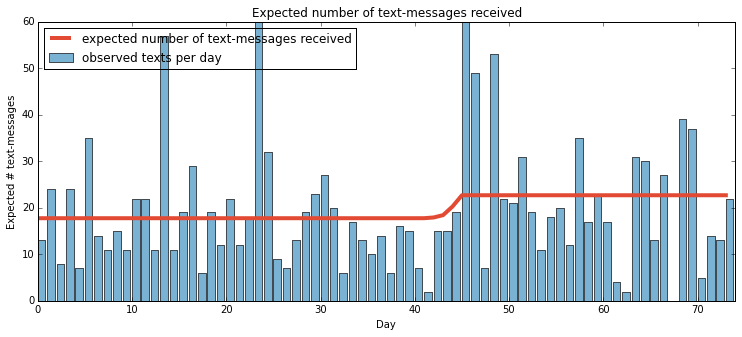

In [14]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

Our analysis shows strong support for believing the user's behavior did change ($\lambda_1$ would have been close in value to $\lambda_2$ had this not been true), and that the change was sudden rather than gradual (as demonstrated by $\tau$'s strongly peaked posterior distribution). We can speculate what might have caused this: a cheaper text-message rate, a recent weather-to-text subscription, or perhaps a new relationship. (In fact, the 45th day corresponds to Christmas, and I moved away to Toronto the next month, leaving a girlfriend behind.)


##### Exercises

1\.  Using `lambda_1_samples` and `lambda_2_samples`, what is the mean of the posterior distributions of $\lambda_1$ and $\lambda_2$?

In [25]:
# type your code here.

2\.  What is the expected percentage increase in text-message rates? `hint:` compute the mean of `lambda_1_samples/lambda_2_samples`. Note that this quantity is very different from `lambda_1_samples.mean()/lambda_2_samples.mean()`.

In [26]:
# type your code here.

3\. What is the mean of $\lambda_1$ **given** that we know $\tau$ is less than 45.  That is, suppose we have been given new information that the change in behaviour occurred prior to day 45. What is the expected value of $\lambda_1$ now? (You do not need to redo the PyMC part. Just consider all instances where `tau_samples < 45`.)

In [17]:
# type your code here.

### References


-  [1] Probabilistic Programming and Bayesian Methods for Hackers - https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

In [17]:
from IPython.core.display import HTML


def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()